### Slow ML - Chapter 11 


In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
    
print("d")

d


# Vanishing / Exploding Gradients Problem


In [2]:
import numpy as np

import tensorflow as tf

In [3]:
def logit(z):
    return 1/(1+np.exp(-z))


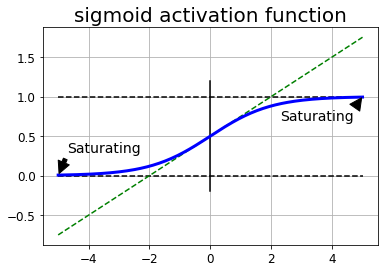

In [4]:
z = np.linspace(-5,5,200)


plt.plot([-5,5],[0,0],'k--')
plt.plot([-5,5],[1,1],'k--')

plt.plot([0,0],[-0.2,1.2],'k-')
plt.plot([-5,5],[-3/4,7/4], 'g--')
plt.plot(z, logit(z),'b-', linewidth= 3)

props =dict(facecolor = "black" , shrink =0.1)

plt.annotate("Saturating", xytext = (3.5,0.7), xy=(5,1), arrowprops = props, fontsize = 14,ha="center")
plt.annotate("Saturating", xytext = (-3.5,0.3), xy=(-5.0,0), arrowprops = props, fontsize = 14, ha="center")
plt.grid(True)

plt.title("sigmoid activation function", fontsize = 20)

plt.show()

# Xavier initialization


In [5]:
import tensorflow as tf


In [6]:
reset_graph()

n_inputs = 28*28 

n_hidden1 = 300

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name = "X")


In [7]:
he_init = tf.contrib.layers.variance_scaling_initializer()

hidden1 = tf.layers.dense(X, n_hidden1, activation =tf.nn.relu, kernel_initializer = he_init, name ="hidden1")

# Nonsaturating Activation Functions


In [8]:
# Leaky Relu

def leaky_relu(z, alpha= 0.01):
    return np.maximum(alpha*z,z)

In [9]:
reset_graph()

Saving figure leaky_relu_plot


FileNotFoundError: [Errno 2] No such file or directory: './images/deep/leaky_relu_plot.png'

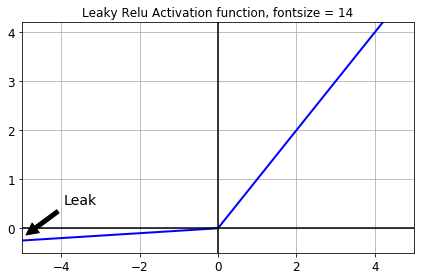

In [10]:
plt.plot(z, leaky_relu(z, alpha =0.05), "b-", linewidth =2 )

plt.plot([-5,5],[0,0], 'k-')

plt.plot([0,0],[-0.5,4.2], "k-")

plt.grid(True)

props = dict(facecolor = "black", shrink = 0.1)

plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops = props, fontsize = 14, ha ="center")

plt.title("Leaky Relu Activation function, fontsize = 14")

plt.axis ([-5,5,-0.5,4.2])


save_fig("leaky_relu_plot")

plt.show()

In [ ]:
reset_graph()

X = tf.placeholder(tf.float32, shape= (None, n_inputs), name = "X")

In [ ]:
def leaky_relu(z, name = None):
    return tf.maximum(0.01 * z, z, name = name )

hidden1 = tf.layers.dense(X, n_hidden1, activation = leaky_relu, name = "hidden1")





In [ ]:
reset_graph()

n_inputs - 28*28 

n_hidden1 = 300

n_hidden2 = 100

n_outputs = 10


In [ ]:
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name = "X")
y = tf.placeholder(tf.int64, shape=(None), name = "y")


In [ ]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation = leaky_relu, name ="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation = leaky_relu, name ="hidden2")
    logits = tf.layers.dense(hidden2, n_outputs, name = "outputs")
    
    

In [ ]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits)

    loss = tf.reduce_mean(xentropy, name = "loss")
    
    

In [ ]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    
    training_op = optimizer.minimize(loss)
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [ ]:
init = tf.global_variables_initializer()

saver = tf.train.Saver()

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/tmp/data/")

In [23]:
n_epochs= 40

batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
        
            sess.run(training_op, feed_dict={X: X_batch, y:y_batch})
        if epoch % 5 ==0:
            acc_train = accuracy.eval(feed_dict ={X:X_batch, y:y_batch})
            acc_test = accuracy.eval(feed_dict = {X : mnist.validation.images, y:mnist.validation.labels})
            
            print(epoch, "Batch accuracy : ", acc_train, "Validation accuracy: ", acc_test)
        
        save_path = saver.save(sess, "./my_model_final.ckpt")
            

NameError: name 'init' is not defined

# Elu

In [ ]:
def elu(z, alpha= 1):
    return np.where(z<0, alpha*(np.exp(z)-1), z)


In [ ]:
plt.plot(z, elu(z), "b-", linewidth = 2)

plt.plot([-5,5],[0,0], 'k-')

plt.plot([-5,5],[-1,-1], 'k--')

plt.plot([0,0], [-1,-1], 'k-')

plt.grid(True)

props = dict(facecolor = 'black', shrink =0.1)

plt.title(r"ELU activation function ($\alpha = 1$)", fontsize = 14)

plt.axis([-5,5,-2.2,3.2])

save_fig("elu_plot")
plt.show()

In [ ]:
reset_graph()


In [ ]:
X = tf.placeholder(tf.float32, shape = (None, n_inputs), name = "X")

In [ ]:
hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.elu, name = "hidden1")

# Batch normalization

In [ ]:
reset_graph()

import tensorflow as tf

n_inputs = 28*28 

n_hidden1 = 300
n_hidden2 = 100

n_outputs = 10

X = tf.placeholder(tf.float32, shape =(None, n_inputs), name = "X")

training = tf.placeholder_with_default(False, shape =(), name="training")

hidden1= tf.layers.dense(X, n_hidden1, name = "hidden1")

bn1 = tf.layers.batch_normalization(hidden1, training=training, momentum=0.9)

bn1_act = tf.nn.elu(bn1)

hidden2 = tf.layers.dense(bn1_act, n_hidden2, name = "hidden2")
bn2 = tf.layers.batch_normalization(hidden2, training = training , momentum=0.9)

bn2_act = tf.nn.elu(bn2)

logits_before_bn = tf.layers.dense(bn2_act, n_outputs, name= "outputs")

logits = tf.layers.batch_normalization(logits_before_bn, training = training, momentum = 0.9)

In [ ]:
reset_graph()


X = tf.placeholder(tf.float32, shape = (None, n_inputs), name = "X")

training = tf.placeholder_with_default(False, shape = () , name = "Training")

In [ ]:
from functools import partial

In [ ]:
my_batch_norm_layer = partial(tf.layers.batch_normalization, training= training, momentum = 0.9)

hidden1 = tf.layers.dense(X, n_hidden1, name = "hidden1")

bn1 = my_batch_norm_layer(hidden1)

bn1_act = tf.nn.elu(bn1)

hidden2 = tf.layers.dense(bn1_act, n_hidden2, name = "hidden2")

bn2 = my_batch_norm_layer(hidden2)

bn2_act = tf.nn.elu(bn2)

logits_before_bn = tf.layers.dense(bn2_act, n_outputs, name = "outputs")

logits = my_batch_norm_layer(logits_before_bn)

# build mnist


ELU activation and Batch norm -> each layer


In [ ]:
reset_graph()

batch_norm_momentum = 0.9

In [ ]:
learning_rate = 0.01

In [ ]:
X = tf.placeholder(tf.float32, shape = (None, n_inputs), name ="X")

y= tf.placeholder(tf.int64, shape = (None), name = "y")

training = tf.placeholder_with_default(False, shape =(), name ="training")

In [ ]:

with tf.name_scope("dnn"):
    he_init = tf.contrib.layers.variance_scaling_initializer()
    
    my_batch_norm_layer = partial(tf.layers.batch_normalization, training =training, momentum = batch_norm_momentum)
    my_dense_layer = partial(tf.layers.dense, kernel_initializer = he_init)
    
    hidden1 = my_dense_layer(X, n_hidden1, name = "hidden1")
    bn1 = tf.nn.elu(my_batch_norm_layer(hidden1))
    hidden2 = my_dense_layer(bn1, n_hidden2, name ="hidden2")
    bn2 = tf.nn.elu(my_batch_norm_layer(hidden2))
    logits_before_bn = my_dense_layer(bn2, n_outputs, name = "outputs")
    logits = my_batch_norm_layer(logits_before_bn)
    
with tf.name_scope("loss"):
    xentorpy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits = logits)

    loss = tf.reduce_mean(xentorpy, name = "loss")
    
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

Note: since we are using `tf.layers.batch_normalization()` rather than `tf.contrib.layers.batch_norm()` (as in the book), we need to explicitly run the extra update operations needed by batch normalization (`sess.run([training_op, extra_update_ops],...`).

In [ ]:
n_epochs = 20
batch_size = 200


In [ ]:
extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)


In [ ]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run([training_op, extra_update_ops], 
                    feed_dict ={training: True, X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: mnist.test.images, y:mnist.test.labels})
        
        print(epoch, "Test accuracy:", accuracy_val)
        
    save_path = saver.save(sess, "./wonseok_slowml_chapter11.ckpt")

In [ ]:
[v.name for v in tf.trainable_variables()]

In [ ]:
[v.name for v in tf.global_variables()]

# Gradient Clipping

In [ ]:
reset_graph()

In [ ]:
n_inputs = 28*28
n_hidden1 = 300

n_hidden2 = 50

n_hidden3 = 50

n_hidden4 = 50

n_hidden5 = 50

n_outputs = 10

X = tf.placeholder(tf.float32, shape = (None,n_inputs), name = "X")
y = tf.placeholder(tf.int64, shape = (None), name ="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, name ="hidden1")
    
    hidden2 =  tf.layers.dense(hidden1, n_hidden2, activation = tf.nn.relu, name = "hidden2")
    
    hidden3 = tf.layers.dense(hidden2, n_hidden3, activation = tf.nn.relu, name = "hidden3")
    
    hidden4 = tf.layers.dense(hidden3, n_hidden4, activation = tf.nn.relu, name = "hidden4")
    
    hidden5 = tf.layers.dense(hidden4, n_hidden5, activation =tf.nn.relu, name = "hidden5")
    

    logits = tf.layers.dense(hidden5, n_outputs, name = "outputs")
    
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels= y, logits = logits )
    loss = tf.reduce_mean(xentropy, name = "loss")

In [ ]:
learning_rate = 0.01

In [ ]:
threshold = 1.0

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate)

grads_and_vars = optimizer.compute_gradients(loss)

In [ ]:
capped_gvs = [(tf.clip_by_value(grad, -threshold, threshold), var)
              for grad, var in grads_and_vars]
             
             
training_op = optimizer.apply_gradients(capped_gvs)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name ="accuracy")


In [ ]:
init = tf.global_variables_initializer()

saver = tf.train.Saver()



In [ ]:
n_epochs =20
batch_size = 200

In [ ]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict = {X: mnist.test.images,y: mnist.test.labels})
        accuracy_val = accuracy.eval(feed_dict = {X : mnist.test.images, 
                                                 y: mnist.test.labels})
        print(epoch, "Test accuracy : ", accuracy_val)
        
    save_path = saver.save(sess, "./my_model_final.ckpt")

# 훈련된 레이어 다시 쓰기


In [11]:
reset_graph()

In [12]:
saver = tf.train.import_meta_graph("./my_model_final.ckpt.meta")

In [15]:
for op in tf.get_default_graph().get_operations():
    print(op.name)

X
y
training/input
training
hidden1/kernel/Initializer/truncated_normal/shape
hidden1/kernel/Initializer/truncated_normal/mean
hidden1/kernel/Initializer/truncated_normal/stddev
hidden1/kernel/Initializer/truncated_normal/TruncatedNormal
hidden1/kernel/Initializer/truncated_normal/mul
hidden1/kernel/Initializer/truncated_normal
hidden1/kernel
hidden1/kernel/Assign
hidden1/kernel/read
hidden1/bias/Initializer/zeros
hidden1/bias
hidden1/bias/Assign
hidden1/bias/read
dnn/hidden1/MatMul
dnn/hidden1/BiasAdd
batch_normalization/beta/Initializer/zeros
batch_normalization/beta
batch_normalization/beta/Assign
batch_normalization/beta/read
batch_normalization/gamma/Initializer/ones
batch_normalization/gamma
batch_normalization/gamma/Assign
batch_normalization/gamma/read
batch_normalization/moving_mean/Initializer/zeros
batch_normalization/moving_mean
batch_normalization/moving_mean/Assign
batch_normalization/moving_mean/read
batch_normalization/moving_variance/Initializer/ones
batch_normalizatio

In [17]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [18]:
show_graph(tf.get_default_graph())

In [19]:

X = tf.get_default_graph().get_tensor_by_name("X:0")

y = tf.get_default_graph().get_tensor_by_name("y:0")

accuracy = tf.get_default_graph().get_tensor_by_name("eval/accuracy:0")

training_op = tf.get_default_graph().get_operation_by_name("GradientDescent")



KeyError: "The name 'eval/accuracy:0' refers to a Tensor which does not exist. The operation, 'eval/accuracy', does not exist in the graph."

In [ ]:
for op in (X, y,accuracy, training_op):
    tf.add_to_collection("my_important_ops", op)

In [ ]:
X, y, accuracy, training_op = tf.get_collecton("my_important_ops")


In [24]:
with tf.Session() as sess:
    
    saver.restore(sess, "./my_model_final.ckpt")
    
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict = {X: X_batch, y:y_batch})
            
        accuracy_Val = accuracy.eval(feed_dict = { X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Test accuracy : ", accuracy_val)
        
        
    save_path = saveer.save(sess,"./my_model_final.ckpt")
    
        
            #continuetraining the model

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


NameError: name 'mnist' is not defined

In [57]:
reset_graph()

In [58]:
n_inputs = 28*28 

n_hidden1 = 300
n_hidden2 = 50
n_hidden3 = 50
n_hidden4 = 50
n_outputs= 10



In [59]:
X = tf.placeholder(tf.float32, shape= (None, n_inputs), name = "X")

y = tf.placeholder(tf.int64, shape = (None), name = "y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation = tf.nn.relu, name = "hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation = tf.nn.relu, name ="hidden2")
    hidden3 = tf.layers.dense(hidden2, n_hidden3, activation = tf.nn.relu, name = "hidden3")
    hidden4= tf.layers.dense(hidden3, n_hidden4, activation =tf.nn.relu, name = "hidden4")
    logits = tf.layers.dense(hidden4, n_outputs, name ="outputs")
    
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits)
    loss = tf.reduce_mean(xentropy, name = "loss")
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name = "accuracy")
learning_rate = 0.01

threshold = 1.0

optimizer = tf.train.GradientDescentOptimizer(learning_rate)

grads_and_vars = optimizer.compute_gradients(loss)

capped_gvs = [(tf.clip_by_value(grad, -threshold, threshold), var)
             for grad, var in grads_and_vars]

training_op = optimizer.apply_gradients(capped_gvs)


init = tf.global_variables_initializer()

saver = tf.train.Saver()




Continue training : 

In [63]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_finla.ckpt")
    
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict = {X : X_batch, y:y_batch})
        accurac_val = accuracy.eval(feed_dict = {X:mnist.test.images,
                                                y:mnist.test.labels})
        print(epoch, "Test accuracy : ", accuracy_val)
    save_path = saver.save(sess,"./my_new_model_final.ckpt")

INFO:tensorflow:Restoring parameters from ./my_model_finla.ckpt


NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ./my_model_finla.ckpt
	 [[Node: save/RestoreV2_17 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_arg_save/Const_0_0, save/RestoreV2_17/tensor_names, save/RestoreV2_17/shape_and_slices)]]

Caused by op 'save/RestoreV2_17', defined at:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.5/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python3.5/dist-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-62-3807040c24c4>", line 8, in <module>
    saver = tf.train.import_meta_graph("./my_model_final.ckpt.meta")
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/training/saver.py", line 1686, in import_meta_graph
    **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/meta_graph.py", line 504, in import_scoped_meta_graph
    producer_op_list=producer_op_list)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/importer.py", line 311, in import_graph_def
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

NotFoundError (see above for traceback): Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ./my_model_finla.ckpt
	 [[Node: save/RestoreV2_17 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_arg_save/Const_0_0, save/RestoreV2_17/tensor_names, save/RestoreV2_17/shape_and_slices)]]


In [64]:
reset_graph()

n_hidden4 = 20 #new model

n_output = 10 # new model 2


saver = tf.train.import_meta_graph("./my_model_final.ckpt.meta")

X =tf.get_default_graph().get_tensor_by_name("X:O")
y = tf.get_default_graph().get_tensor_by_name("y:O")

hidden3=tf.get_default_graph().get_tensor_by_name("dnn/hidden4")


new_hidden4 = tf.layers.dense(hidden3, n_hidden4, activation=tf.nn.relu, name="new_hidden4")

new_logits = tf.layers.dense(new_hidden4, n_outputs, name="new_outputs")

with tf.name_scope("new_loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = new_logits)
    
    loss = tf.reduce_mean(xentropy, name ="loss")
    
with tf.name_scope("new_eval"):
    correct = tf.nn.in_top_k(new_logits, y,1)
    accuracy = tf.reduce_mean(tf.cast(corrcet,tf.float32), name  ="accuracy")
    
with tf.name_scope("new_train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op =optimizer.minimize(loss)
    
init = tf.global_variables_initialzier()

new_saver = tf.train.Saver()

ValueError: The name 'X:O' looks a like a Tensor name, but is not a valid one. Tensor names must be of the form "<op_name>:<output_index>".

We can train the new model

In [65]:
with tf.Session() as sess:
    init.run()
    saver.restore(sess, "./my_model_final.ckpt")
    
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples//batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict = {X:X_batch, y:y_batch})
        accuracy_val =accuracy.eval(feed_dict = {X: mnist.test.images, y:mnist.test.labels})
        
        print(epoch, "Test accuracy : ", accuracy_val)
        
    save_path = new_saver.save(sess, "./my_new_model_final.ckpt")
    
    

ValueError: Cannot use the default session to execute operation: the operation's graph is different from the session's graph. Pass an explicit session to run(session=sess).

In [67]:
reset_graph()


In [72]:
n_inputs = 28* 28

n_hidden1 = 300
n_hidden2 = 50
n_hidden3 = 50
n_hidden4 = 20

n_outputs = 10

X = tf.placeholder(tf.float32, shape = (None, n_inputs), name = "X")

y = tf.placeholder(tf.int64, shape = (None), name = "y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation = tf.nn.relu, name = "hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation = tf.nn.relu, name = "hidden2")
    
    hidden3 = tf.layers.dense(hidden2, n_hidden3, activation = tf.nn.relu, name = "hidden3")
    hidden4 = tf.layers.dense(hidden3, n_hidden4, activation = tf.nn.relu, name = "hidden4")
    
    logits = tf.layers.dense(hidden4, n_outputs, name = "outputs")
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels= y, logits = logits)
    
    loss = tf.reduce_mean(xentropy, name = "loss")
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name = "accuracy")
    
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)
    
    

In [74]:
reuse_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope = "hidden[123]")

reuse_vars_dict =dict([(var.op.name, var) for var in reuse_vars])

resotre_saver = tf.train.Saver(reuse_vars_dict)



init = tf.global_variables_initializer()

saver = tf.train.Saver()



In [77]:
import numpy as np

n_batches = mnist.train.num_examples // batch_size


with tf.Session() as sess:
    init.run()
    restore_saver/resotre(sess, "./my_model_final.ckpt")
    h2_cache = sess.run(hidden2, feed_dict = {X:mnist.test.images})
    
    for epoch in range(n_epochs):
        shuffled_idx = np.random.permutation(mnist.train.num_examples)
        hidden2_batches = np.array_split(h2_cache[shuffled_idx], n_batches)
        y_batches = np.array_split(mnist.train.labels[shuffled_idx], n_batches)

        for hidden2_batch, y_batch in zip(hidden2_batches, y_batches):
            sess.run(training_op, feed_dict = {hidden2:hidden2_batch, y:y_batch})
        accuracy_val = accuracy.eval(feed_dict = {hidden2: h2_cache_test,
                                                 y:mnist.test.labels})
        print(epoch, "Test accuracy: ", accuracy_val)
    save_path = saver.save(sess, "./my_new_mode_final.ckpt")
    

NameError: name 'mnist' is not defined

# Fast Optimizers

### Momentum optimization 



In [78]:
optimizer = tf.train.MomentumOptimizer(learning_rate = learning_rate, momentum = 0.9)

### Nesterov Accelerated Gradient


In [79]:
optimizer = tf.train.MomentumOptimizer(learning_rate = learning_rate, momentum=0.9, use_nesterov = True)

In [ ]:
#AdaGrad
optimizer = tf.train.AdagradOptimizer(learning_rate= learning_rate)

In [80]:
#RMSProp

optimizer =tf.train.RMSPropOptimizer(learning_rate = learning_rate, momentum= 0.9, decay =0.9, epsilon=1e-10)

In [ ]:
#Adam Optimization

optimizer =tf.train.AdamOptimizer(learning_rate = learning_rate)

### Learning Rate scheduling


In [83]:
reset_graph()

n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 50
n_outputs = 10



X = tf.placeholder(tf.float32, shape = (None, n_inputs), name = "X")

y= tf.placeholder(tf.int64, shape = (None), name ="y")

with tf.name_scope("dnn"):
        hidden1 = tf.layers.dense(X, n_hidden1, activation = tf.nn.relu, name ="hidden1")
        hidden2 = tf.layers.dense(hidden1, n_hidden2, activation = tf.nn.relu, name = "hidden2")
        logits = tf.layers.dense(hidden2, n_outputs, name ="outputs")
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits)
    loss = tf.reduce_mean(xentropy, name = "loss")
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name = "accuracy")
    

In [86]:

with tf.name_scope("train"):
    initial_learning_rate = 0.1
    decay_steps = 10000
    decay_rate = 1/10
    global_step = tf.Variable(0, trainable = False, name = "global_step")
    learning_rate = tf.train.exponential_decay(initial_learning_rate, global_step, decay_steps, decay_rate)
    
    optimizer = tf.train.MomentumOptimizer(learning_rate, momentum=0.9)
    training_op = optimizer.minimize(loss, global_step = global_step)
    
    

In [87]:
init = tf.global_variables_initializer()
saver  = tf.train.Saver()

In [89]:
n_epochs = 5
batch_size = 50


with tf.Session() as sess:
    
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict = {X:X_batch, y:y_batch})
        accuracy_val = accuracy.eval(feed_dict = {X: mnist.test.images, y:mnist.test.labels})

        print(epoch, "Test accuracy : ", accuracy_val)
    save_path = saver.save(sess, "./my_model_final.ckpt")

NameError: name 'mnist' is not defined

# Avoiding Overfitting Through Regulariztion

In [91]:
#l1 and l2 regulariztion


implement l1 regularization manually


In [100]:
reset_graph()

In [101]:
n_inputs = 28*28
n_hidden1 = 300
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name ="X")

y = tf.placeholder(tf.int64, shape = (None), name ="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation = tf.nn.relu, name = "hidden1")
    logits = tf.layers.dense(hidden1, n_outputs, name ="outputs")

In [105]:
W1 =  tf.get_default_graph().get_tensor_by_name("hidden1/kernel:0")
W2 = tf.get_default_graph().get_tensor_by_name("outputs/kernel:0")

scale = 0.001 #l1 regularization hyperparameter

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits= logits)
    
    base_loss = tf.reduce_mean(xentropy, name = "avg_xentropy")
    
    reg_losses = tf.reduce_sum(tf.abs(W1))+ tf.reduce_sum(tf.abs(W2))
    loss = tf.add(base_loss, scale * reg_losses, name="loss")

In [106]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)

    
    
    
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name = "accuracy")

learning_rate =0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)
    
init =tf.global_variables_initializer()

saver =tf.train.Saver()


In [ ]:
n_epochs = 20

batch_size = 200

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples//batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict = {X: X_batch, y:y_batch})
        print(epoch, "Test accuracy:", accuracy_val)
    save_path = saver.save(sess, "./my_model_final.ckpt")
    

       

In [109]:
# using python's partial()

In [111]:
reset_graph()


n_inputs = 28*28

n_hidden1 = 300
n_hidden2 = 50

n_outputs = 10

X = tf.placeholder(tf.float32, shape = (None, n_inputs), name ="X")
y = tf.placeholder(tf.int64, shape=(Nfone), name = "y")


In [112]:
scale = 0.001

In [113]:
my_dense_layer = partial(tf.layers.dense, activation= tf.nn.relu, kernel_regularizer = tf.contrib.layers.l1_regularizer(scale))



with tf.name_scope("dnn"):
        hidden1 = my_dense_layer(X, n_hidden1, name = "hidden1")
        hidden2 = my_dense_layer(hidden1, n_hidden2, name="hidden2")
        logits = my_dense_layer(hidde2, n_outputs, activation =None, name ="outputs")
        
    

NameError: name 'partial' is not defined

In [115]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name = "accuracy")
    
    
learning_rate = 0.01


with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()



ValueError: Tensor("y:0", dtype=int64) must be from the same graph as Tensor("dnn/outputs/BiasAdd:0", shape=(?, 10), dtype=float32).

In [116]:
n_epochs = 20
batch_size = 200

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict = {X: X_batch, y:y_batch})
        accuracy_val = accuracy.eval(feed_dict = {X:mnist.test.images, y.mnist.test.labels})
        print(epoch, "Test accuracy:", accuracy_val)
    save_path = saver.save(sess, "./my_model_final.ckpt")
    
    

SyntaxError: invalid syntax (<ipython-input-116-8c0db9893d12>, line 10)

# Dropout

In [117]:
#use tf.layers,dropout()



In [118]:
import tensorflow as tf


In [119]:
reset_graph()

In [120]:
X = tf.placeholder(tf.float32, shape = (None, n_inputs), name = "X")
y = tf.placeholder(tf.int64, shape = (None), name = "y")

In [121]:
training = tf.placeholder_with_default(False, shape=(), name = "training")

dropout_rate = 0.5

X_drop=tf.layers.dropout(X, dropout_rate, training= training)

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X_drop, n_hidden1, activation = tf.nn.relu, name = "hidden1")
    hidden1_drop = tf.layers.dropout(hidden1, dropout_rate, training = training)
    hidden2 = tf.layers.dense(hidden1_drop, n_hidden2, activation = tf.nn.relu, name = "hidden2")
    hidden2_drop = tf.layers.dropout(hidden2, dropout_rate, training = training)
    logits = tf.layers.dense(hidden2_drop, n_outputs, name ="outputs")
    
    

In [122]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits = logits)
    loss = tf.reduce_mean(xentropy, name = "loss")
    
with tf.name_scope("train"):
    optimizer = tf.train.MomentumOptimizer(learning_rate , momentum =0.09)
    training_op = optimizer.minimize(loss)
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()

saver = tf.train.Saver()



In [123]:
n_epochs = 20

batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size) :
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict = {training: True, X: X_batch, y:y_batch})
        acc_test = accuracy.eval(feed_dict = {X: mnist.test.images, y:mnist.test.labels})
        print(epoch, "test accuracy : ", acc_test)
    save_path = saver.save(sess, "./my_model_final.ckpt")

NameError: name 'mnist' is not defined

# Max norm


In [126]:
reset_graph()

n_inputs = 28*28

n_hidden1 = 300
n_hidden2 = 50
n_outputs= 10

learning_rate = 0.01
momentum = 0.9

X = tf.placeholder(tf.float32, shape = (None, n_inputs), name = "X")
y = tf.placeholder(tf.int64, shape = (None), name = "y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation = tf.nn.relu, name = "hidden1" )
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation = tf.nn.relu, name = "hidden2")
    logits = tf.layers.dense(hidden2, n_outputs, name = "outputs")
    
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits)
    loss = tf.reduce_mean(xentropy, name = "loss")
with tf.name_scope("train"):
    optimizer = tf.train.MomentumOptimizer(learning_rate, momentum)
    training_op = optimizer.minimize(loss)
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    


In [130]:
threshold = 1.0

weights = tf.get_default_graph().get_tensor_by_name("hidden2/kernel:0")

clipped_weights = tf.clip_by_norm(weights, clip_norm = threshold, axes = 1)


clip_weight = tf.assign(weights, clipped_weights)

In [131]:
#do this second layer


In [137]:
weights2 = tf.get_default_graph().get_tensor_by_name("hidden2/kernel:0")

clipped_weights2 = tf.clip_by_norm(weights2, clip_norm = threshold, axes=1)


clip_weights2 = tf.assign(weights2, clipped_weights2)

In [138]:
init = tf.global_variables_initializer()

saver = tf.train.Saver()



In [140]:
n_epochs = 20

batch_size = 50

In [142]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict = {X : X_batch, y:y_batch})
            clip_weights.eval()
            clip_weights2.eval()
            
        acc_test = accuracy.eval(feed_dict = {X: mnist.test.images, 
                                             y : mnist.test.labels})
        print(epoch, "Test accuracy: ", acc_test)
    save_path = saver.save(sess, "./my_model_final.ckpt")

NameError: name 'mnist' is not defined

In [143]:
def max_norm_regularizer(threshold, axes = 1, name = "max_norm", collection = "max_norm"):
    def max_norm(weights):
        clipped = tf.clip_by_norm(weights, clip_norm = threshold, axes = axes)
        clip_weights = tf.assign(weights, clipped, name = name)
        tf.add_to_collection(collection, clip_weights)
        return None
    return max_norm